In [126]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz

--2021-10-23 16:40:30--  https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz’

cifar-100-python.ta 100%[===================>] 161.17M  89.7MB/s    in 1.8s    

2021-10-23 16:40:32 (89.7 MB/s) - ‘cifar-100-python.tar.gz’ saved [169001437/169001437]



In [ ]:
!tar -xvf '/content/drive/MyDrive/AI_ML_DL_Assignment/cifar-100-python.tar.gz' -C '/content/drive/MyDrive/AI_ML_DL_Assignment/CIFAR/'
# tar –tzf '/content/drive/MyDrive/AI_ML_DL_Assignment/cifar-100-python.tar.gz'

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/AI_ML_DL_Assignment/

/content/drive/MyDrive/AI_ML_DL_Assignment


In [ ]:
ls -s

total 165048
     4 CIFAR/  165041 cifar-100-python.tar.gz       4 CIFAR_10.ipynb


In [ ]:
cd cifar-100-python

/content/drive/My Drive/AI_ML_DL_Assignment/CIFAR/cifar-100-python


In [ ]:
ls -s

total 181935
     0 file.txt~       2 meta   30322 test  151612 train


# Importing Libraries

In [79]:
import re
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime

from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing 
import keras
from keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
# from keras.utils import print_summary, to_categorical
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D, MaxPooling2D, MaxPool2D,BatchNormalization
from keras_sequential_ascii import sequential_model_to_ascii_printout


In [6]:
!pip install keras_sequential_ascii


  Created wheel for keras-sequential-ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3062 sha256=b9f15821480198edf0c8ff7b186d596b87236cce49391f22fcbadb90bc29d845
  Stored in directory: /root/.cache/pip/wheels/4e/99/75/8910ced4b40e8c20088c237fa706b32ac758321482ae2659e3
Successfully built keras-sequential-ascii




```
# This is formatted as code
```

# 1. Loading Dataset

In [17]:
def load_cifar_data():
   all_classes =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
   (x_train, y_train), (x_test, y_test) = cifar10.load_data()
   
   print('X_train shape: {}'.format(x_train.shape))
   print('train samples: {}'.format(x_train.shape[0]))
   print('test samples: {}'.format(x_test.shape[0]))

   num_out_node=len(all_classes)

   print(num_out_node)
   
   y_train = to_categorical(y_train, num_out_node)
   y_test = to_categorical(y_test, num_out_node)
   
   x_train = x_train.astype('float32')
   x_test = x_test.astype('float32')
   
   x_train /= 255.0
   x_test /= 255.0


   return num_out_node,all_classes, x_train, y_train, x_test, y_test

In [18]:
num_out_node,all_classes, x_train, y_train, x_test, y_test = load_cifar_data()

X_train shape: (50000, 32, 32, 3)
train samples: 50000
test samples: 10000
10


#2. EDA

In [19]:
all_classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [20]:
x_train[0].shape

(32, 32, 3)

In [21]:
y_train[0].shape

(10,)

In [22]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [23]:
test = y_train[0:100]

In [41]:
num_of_ins = {}

for i in y_train:
  result = np.where(i == 1)
  out_class = all_classes[result[0][0]]
  if out_class in num_of_ins:
    num_of_ins[out_class] = num_of_ins[out_class] + 1
  else:
    num_of_ins[out_class] = 1


In [43]:
print("X_Train Total Number class and their instances :",num_of_ins)

X_Train Total Number class and their instances : {'frog': 5000, 'truck': 5000, 'deer': 5000, 'automobile': 5000, 'bird': 5000, 'horse': 5000, 'ship': 5000, 'cat': 5000, 'dog': 5000, 'airplane': 5000}


In [44]:
num_of_ins = {}

for i in y_test:
  result = np.where(i == 1)
  out_class = all_classes[result[0][0]]
  if out_class in num_of_ins:
    num_of_ins[out_class] = num_of_ins[out_class] + 1
  else:
    num_of_ins[out_class] = 1


In [46]:
print("X_Test Total Number class and their instances :",num_of_ins)

X_Test Total Number class and their instances : {'cat': 1000, 'ship': 1000, 'airplane': 1000, 'frog': 1000, 'automobile': 1000, 'truck': 1000, 'dog': 1000, 'horse': 1000, 'deer': 1000, 'bird': 1000}


# 3. Creating Neutral Network

In [80]:
cifar_model = Sequential()

In [81]:
cifar_model.add(Conv2D(filters=32, 
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                input_shape=(32, 32, 3)))

In [82]:
cifar_model.add(MaxPool2D())

In [83]:
cifar_model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                padding='same',
                activation='relu'))

In [84]:
cifar_model.add(MaxPool2D())
cifar_model.add(Dropout(0.2))

In [85]:
cifar_model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                padding='same',
                activation='relu'))

In [86]:
cifar_model.add(MaxPool2D())
cifar_model.add(Dropout(0.2))

In [87]:
cifar_model.add(Flatten())
cifar_model.add(Dense(256, activation='relu'))
cifar_model.add(BatchNormalization())
cifar_model.add(Dropout(0.5))

In [88]:
cifar_model.add(Dense(10, activation='sigmoid'))

In [89]:
cifar_model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [90]:
cifar_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)         

# 4. Training **Model**

In [92]:
model_his=cifar_model.fit(x_train,y_train, validation_split=0.2, batch_size=64,epochs=30,verbose=1)

Epoch 1/30
625/625 [==============================] - 10s 16ms/step - loss: 0.7841 - accuracy: 0.7262 - val_loss: 0.7993 - val_accuracy: 0.7176
Epoch 2/30
625/625 [==============================] - 10s 15ms/step - loss: 0.7649 - accuracy: 0.7325 - val_loss: 0.7445 - val_accuracy: 0.7395
Epoch 3/30
625/625 [==============================] - 10s 16ms/step - loss: 0.7427 - accuracy: 0.7412 - val_loss: 0.7168 - val_accuracy: 0.7526
Epoch 4/30
625/625 [==============================] - 10s 15ms/step - loss: 0.7267 - accuracy: 0.7452 - val_loss: 0.7160 - val_accuracy: 0.7497
Epoch 5/30
625/625 [==============================] - 10s 15ms/step - loss: 0.7143 - accuracy: 0.7498 - val_loss: 0.7124 - val_accuracy: 0.7546
Epoch 6/30
625/625 [==============================] - 10s 15ms/step - loss: 0.6928 - accuracy: 0.7587 - val_loss: 0.7312 - val_accuracy: 0.7460
Epoch 7/30
625/625 [==============================] - 10s 15ms/step - loss: 0.6811 - accuracy: 0.7612 - val_loss: 0.6904 - val_accuracy:

#**5**. Evaluate Model

In [97]:
scores = cifar_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.7843 - accuracy: 0.7356
Test loss: 0.7842718362808228
Test accuracy: 0.7355999946594238


# 6. summarize history for accuracy

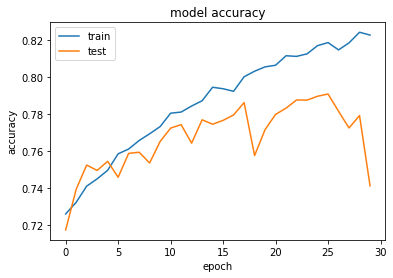

In [98]:
plt.plot(model_his.history['accuracy'])
plt.plot(model_his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 7.summarize history for loss

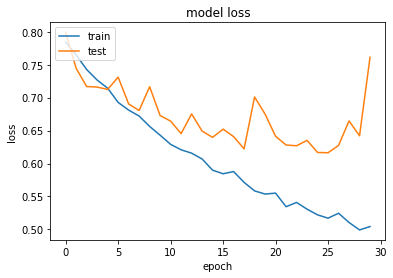

In [99]:
plt.plot(model_his.history['loss'])
plt.plot(model_his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 8. Confusion matrix result


313/313 - 1s
[[668   1  78  26  76   6  31   9  88  17]
 [  7 808   7  13   8   7  42   7  47  54]
 [ 28   0 588  39 140  49 134  11   9   2]
 [  6   1  41 579  97 126 132  13   4   1]
 [  2   0  25  27 845   7  84   7   3   0]
 [  2   0  31 179  80 635  56  14   2   1]
 [  2   0  13  32  27   9 912   3   2   0]
 [  6   0  34  35 193  59  27 644   1   1]
 [ 18   4  13  22  19   3  19   3 894   5]
 [ 24  44   6  35  22  13  27  11  35 783]]


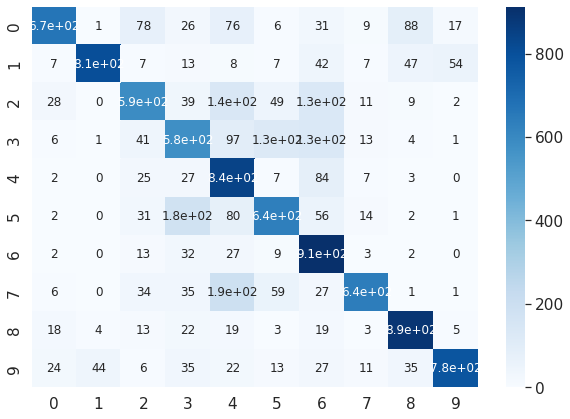

In [101]:
import seaborn as sn
Y_pred = cifar_model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm) 
 
df_cm = pd.DataFrame(cm, range(10),  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues",annot=True,annot_kws={"size": 12})# font size
plt.show()

# 9. Plotting Prediction 

In [112]:
%matplotlib inline


In [113]:
y_hat = cifar_model.predict(x_test)

<Figure size 1440x576 with 0 Axes>

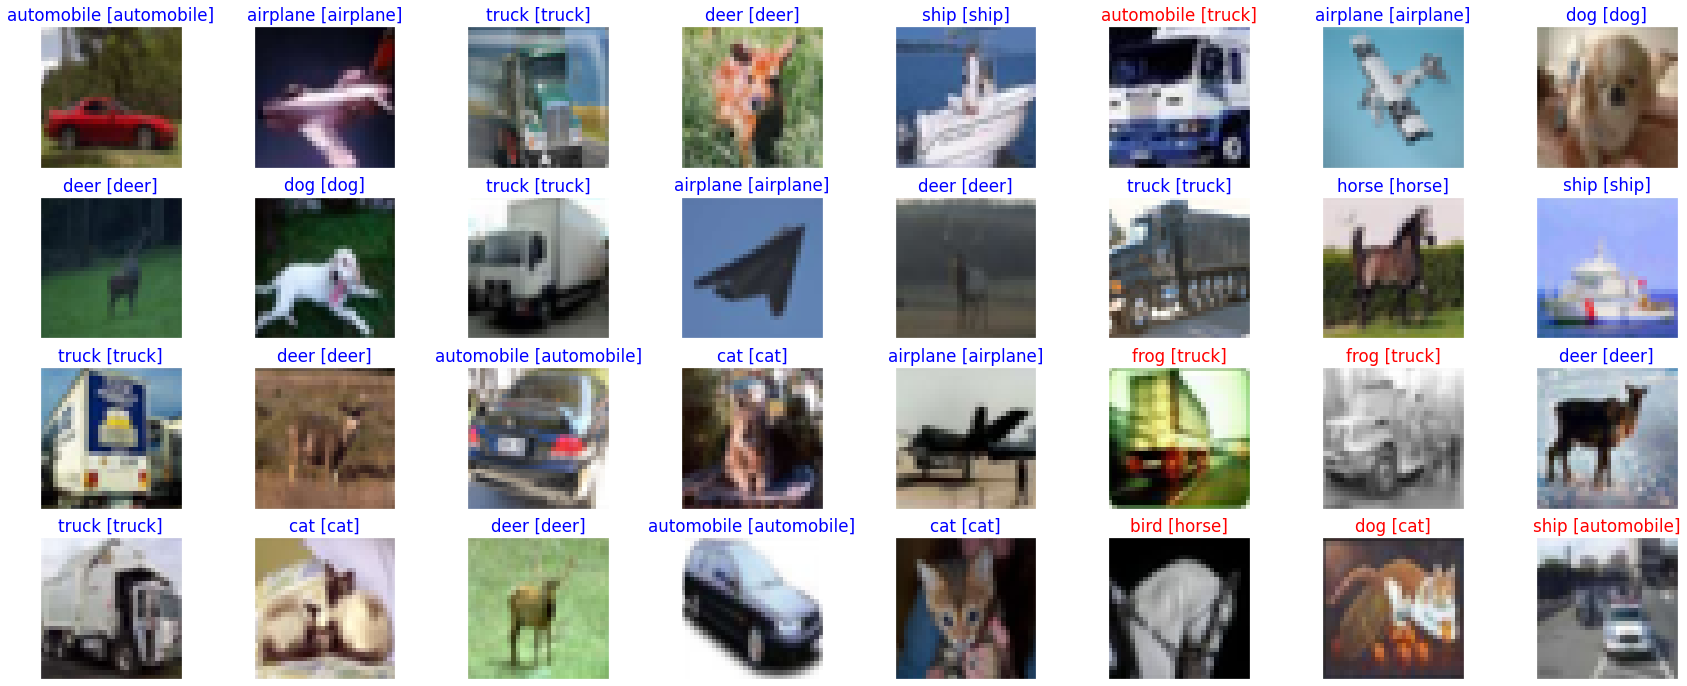

In [121]:
fig = plt.figure(figsize=(30, 12))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} [{}]".format(all_classes[pred_idx], all_classes[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

# 10 Serialize model to JSON


In [122]:
model_json = cifar_model.to_json()
with open("cifar_model.json", "w") as json_file:
    json_file.write(model_json)
    
  

# 11. Serialize weights to HDF5


In [123]:
cifar_model.save_weights("cifar_model.h5")

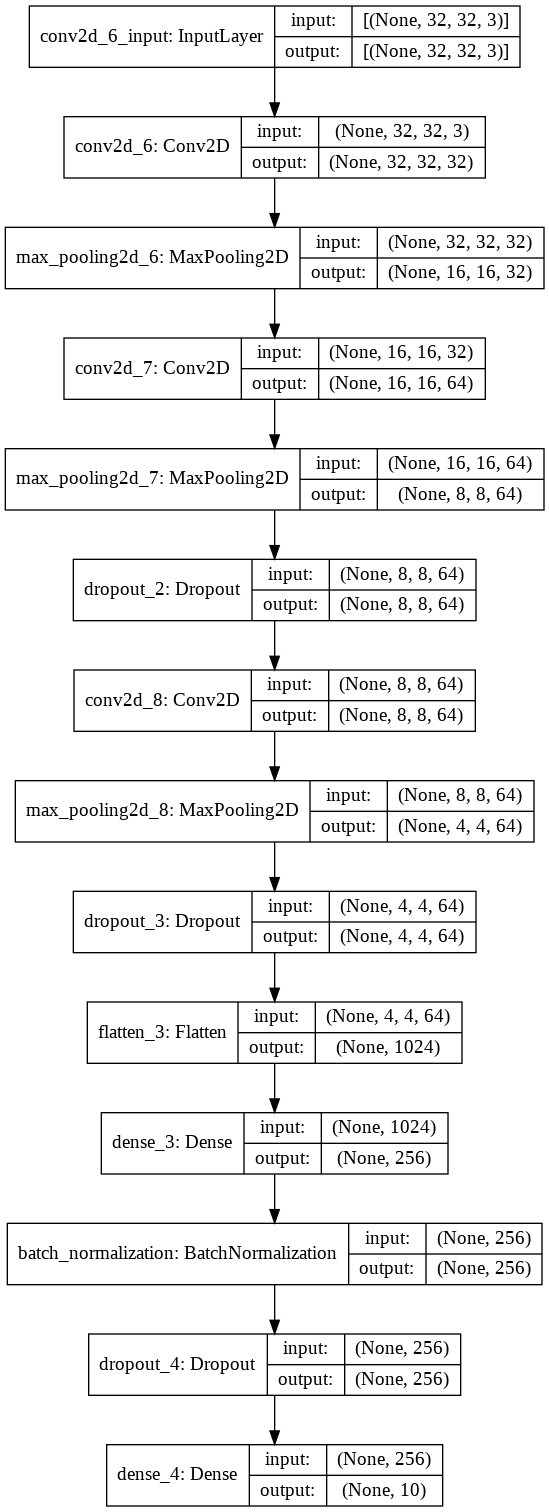

In [125]:
from tensorflow.keras.utils import plot_model
plot_model(cifar_model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')